In [1]:
%matplotlib inline
import numpy as np

## 2.5.1 介绍

(密集) 矩阵是:
- 数据对象
- 存储二维值数组的数据结构

重要特征:
- 一次分配所有项目的内存
    - 通常是一个连续组块，想一想Numpy数组
- *快速*访问个项目(*)

### 2.5.1.1 为什么有稀疏矩阵？

- 内存，增长是n**2
- 小例子（双精度矩阵）:

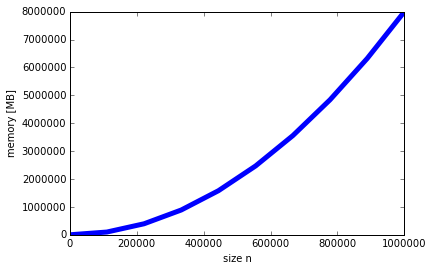

In [5]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 1e6, 10)
plt.plot(x, 8.0 * (x**2) / 1e6, lw=5)   
plt.xlabel('size n')
plt.ylabel('memory [MB]')

### 2.5.1.2 稀疏矩阵 vs. 稀疏矩阵存储方案

- 稀疏矩阵是一个矩阵，巨大多数是空的
- 存储所有的0是浪费 -> 只存储非0项目
- 想一下**压缩**
- 有利: 巨大的内存节省
- 不利: 依赖实际的存储方案, (\*) 通常并不能满足

### 2.5.1.3 典型应用
- 偏微分方程（PDES）的解
    - 有限元素法
    - 机械工程、电子、物理...
- 图论
    - （i，j）不是0表示节点i与节点j是联接的
- ...

### 2.5.1.4 先决条件

最新版本的
- `numpy`
- `scipy`
- `matplotlib` (可选)
- `ipython` (那些增强很方便)

### 2.5.1.5 稀疏结构可视化

- matplotlib中的`spy()`
- 样例绘图:

![](http://scipy-lectures.github.io/_images/graph.png)
![](http://scipy-lectures.github.io/_images/graph_g.png)
![](http://scipy-lectures.github.io/_images/graph_rcm.png)

## 2.5.2 存储机制

- scipy.sparse中有七类稀疏矩阵:
    1. csc_matrix: 压缩列格式
    2. csr_matrix: 压缩行格式
    3. bsr_matrix: 块压缩行格式
    4. lil_matrix: 列表的列表格式
    5. dok_matrix: 值的字典格式
    6. coo_matrix: 座标格式 (即 IJV, 三维格式)
    7. dia_matrix: 对角线格式
- 每一个类型适用于一些任务
- 许多都利用了由Nathan Bell提供的稀疏工具 C ++ 模块
- 假设导入了下列模块:

In [5]:
import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt

- 给Numpy用户的**warning**:
    - 使用'\*'的乘是*矩阵相乘* (点积)
    - 并不是Numpy的一部分!
        - 向Numpy函数传递一个稀疏矩阵希望一个ndarray/矩阵是没用的

### 2.5.2.1 通用方法

- 所有scipy.sparse类都是spmatrix的子类
    - 算术操作的默认实现
        - 通常转化为CSR
        - 为了效率而子类覆盖
    - 形状、数据类型设置/获取
    - 非0索引
    - 格式转化、与Numpy交互(toarray(), todense())
    - ...

- 属性:
    - mtx.A - 与mtx.toarray()相同
    - mtx.T - 转置 (与mtx.transpose()相同)
    - mtx.H - Hermitian (列举) 转置
    - mtx.real - 复矩阵的真部
    - mtx.imag - 复矩阵的虚部
    - mtx.size - 非零数 (与self.getnnz()相同)
    - mtx.shape - 行数和列数 (元组)

- 数据通常储存在Numpy数组中

### 2.5.2.2 稀疏矩阵类
#### 2.5.2.2.1 对角线格式 (DIA)
- 非常简单的格式
- 形状 (n_diag, length) 的密集Numpy数组的对角线
    - 固定长度 -> 当离主对角线比较远时会浪费空间
    - \_data_matrix的子类 (带数据属性的稀疏矩阵类)
- 每个对角线的偏移
    - 0 是主对角线
    - 负偏移 = 下面
    - 正偏移 = 上面
- 快速矩阵 * 向量 (sparsetools)
- 快速方便的关于项目的操作
    - 直接操作数据数组 (快速的NumPy机件)
- 构建器接受 :
    - 密集矩阵 (数组)
    - 稀疏矩阵
    - 形状元组 (创建空矩阵)
    - (数据, 偏移) 元组
- 没有切片、没有单个项目访问
- 用法 :
    - 非常专业
    - 通过有限微分解偏微分方程
    - 有一个迭代求解器
##### 2.5.2.2.1.1 示例
- 创建一些DIA矩阵 :

In [3]:
data = np.array([[1, 2, 3, 4]]).repeat(3, axis=0)
data

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [6]:
offsets = np.array([0, -1, 2])
mtx = sparse.dia_matrix((data, offsets), shape=(4, 4))
mtx 

<4x4 sparse matrix of type '<type 'numpy.int64'>'
	with 9 stored elements (3 diagonals) in DIAgonal format>

In [7]:
mtx.todense()

matrix([[1, 0, 3, 0],
        [1, 2, 0, 4],
        [0, 2, 3, 0],
        [0, 0, 3, 4]])

In [9]:
data = np.arange(12).reshape((3, 4)) + 1
data

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [10]:
mtx = sparse.dia_matrix((data, offsets), shape=(4, 4))
mtx.data

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [11]:
mtx.offsets

array([ 0, -1,  2], dtype=int32)

In [12]:
print mtx

  (0, 0)	1
  (1, 1)	2
  (2, 2)	3
  (3, 3)	4
  (1, 0)	5
  (2, 1)	6
  (3, 2)	7
  (0, 2)	11
  (1, 3)	12


In [13]:
mtx.todense()

matrix([[ 1,  0, 11,  0],
        [ 5,  2,  0, 12],
        [ 0,  6,  3,  0],
        [ 0,  0,  7,  4]])

- 机制的解释 :

偏移: 行

     2:  9
     1:  --10------
     0:  1  . 11  .
    -1:  5  2  . 12
    -2:  .  6  3  .
    -3:  .  .  7  4
         ---------8
         
- 矩阵-向量相乘

In [15]:
vec = np.ones((4, ))
vec

array([ 1.,  1.,  1.,  1.])

In [16]:
mtx * vec

array([ 12.,  19.,   9.,  11.])

In [17]:
mtx.toarray() * vec

array([[  1.,   0.,  11.,   0.],
       [  5.,   2.,   0.,  12.],
       [  0.,   6.,   3.,   0.],
       [  0.,   0.,   7.,   4.]])

#### 2.5.2.2.2 列表的列表格式 (LIL)
- 基于行的联接列表
    - 每一行是一个Python列表（排序的）非零元素的列索引
    - 行存储在Numpy数组中 (dtype=np.object)
    - 非零值也近似存储
- 高效增量构建稀疏矩阵
- 构建器接受 :
    - 密集矩阵 (数组)
    - 稀疏矩阵
    - 形状元组 (创建一个空矩阵)
- 灵活切片、高效改变稀疏结构
- 由于是基于行的，算术和行切片慢
- 用途 :
    - 当稀疏模式并不是已知的逻辑或改变
    - 例子：从一个文本文件读取稀疏矩阵
##### 2.5.2.2.2.1 示例
- 创建一个空的LIL矩阵 :
#### 2.5.2.2.3 值的字典格式 (DOK)
##### 2.5.2.2.3.1 示例
#### 2.5.2.2.4 座标格式 (COO)
##### 2.5.2.2.4.1 示例
#### 2.5.2.2.5 压缩稀疏行格式 (CSR)
##### 2.5.2.2.5.1 示例
#### 2.5.2.2.6 压缩稀疏列格式 (CSC)
##### 2.5.2.2.6.1. 示例
#### 2.5.2.2.7 块压缩行格式 (BSR)
##### 2.5.2.2.7.1 示例


In [14]:
offset: row
    

SyntaxError: invalid syntax (<ipython-input-14-7bb15abc289b>, line 1)

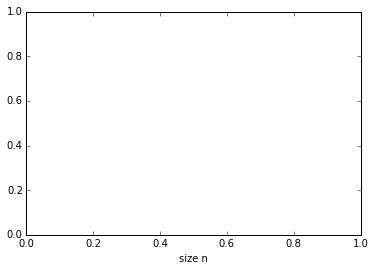

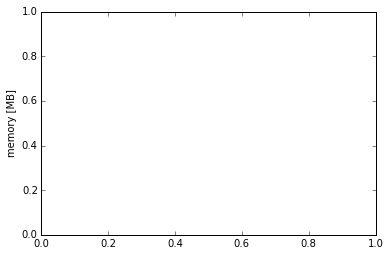